# Who should be the first pick drafted in the 2021 NFL Fantasy Draft? This project aims to predict players total points for next season to provide an objective ranking.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

In [2]:
# df_2020 = pd.read_csv('2020NFLFantasyStats.csv', header = 1)
# df_2020['Player'] = df_2020['Player'].str.split('\\').str[0].str.replace('[+,*]','')
# df_2019 = pd.read_csv('2019NFLFantasyStats.csv',header = 1)
# df_2019['Player'] = df_2019['Player'].str.split('\\').str[0].str.replace('[+,*]','')


In [3]:
# Load in the Data
list_of_names = ['2020NFLFantasyStats','2019NFLFantasyStats','2018NFLFantasyStats','2017NFLFantasyStats','2016NFLFantasyStats','2015NFLFantasyStats','2014NFLFantasyStats','2013NFLFantasyStats','2012NFLFantasyStats','2011NFLFantasyStats']
df_list = []

for i in range(len(list_of_names)):
    temp_df = pd.read_csv( list_of_names[i] + '.csv',header = 1)
    temp_df['Player'] = temp_df['Player'].str.split('\\').str[0].str.replace('[+,*]','').str.strip()
    df_list.append(temp_df)

In [4]:
# Add the year column to each dataset
for dataset in df_list:
    df_2020 = df_list[0]
    df_2020['Year'] = 2020
    df_2019 = df_list[1]
    df_2019['Year'] = 2019
    df_2018 = df_list[2]
    df_2018['Year'] = 2018
    df_2017 = df_list[3]
    df_2017['Year'] = 2017
    df_2016 = df_list[4]
    df_2016['Year'] = 2016
    df_2015 = df_list[5]
    df_2015['Year'] = 2015
    df_2014 = df_list[6]
    df_2014['Year'] = 2014
    df_2013 = df_list[7]
    df_2013['Year'] = 2013
    df_2012 = df_list[8]
    df_2012['Year'] = 2012
    df_2011 = df_list[9]
    df_2011['Year'] = 2011
    display(dataset)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,1.0,NaN,314.0,333.1,341.1,323.6,184.0,1,1.0,2020
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,NaN,NaN,295.0,377.8,383.8,336.3,165.0,2,2.0,2020
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,3.0,NaN,294.0,337.8,346.8,315.8,164.0,3,3.0,2020
3,4,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,NaN,208.0,312.8,316.8,260.3,117.0,1,4.0,2020
4,5,Davante Adams,GNB,WR,28,14,14,0,0,0,...,NaN,NaN,243.0,358.4,362.4,300.9,117.0,1,5.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,622,Andre Roberts,BUF,WR,32,15,0,0,0,0,...,NaN,NaN,-1.0,3.1,5.1,1.1,NaN,245,NaN,2020
622,623,Nate Sudfeld,PHI,QB,27,1,0,5,12,32,...,NaN,NaN,-2.0,-1.5,0.5,-0.5,NaN,81,NaN,2020
623,624,Nsimba Webster,LAR,NaN,24,16,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,248,NaN,2020
624,625,Dede Westbrook,JAX,WR,27,2,0,0,0,0,...,NaN,NaN,-2.0,-0.6,0.4,-1.1,NaN,247,NaN,2020


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Christian McCaffrey,CAR,RB,23,16,16,0,2,0,...,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0,2019
1,2,Lamar Jackson,BAL,QB,22,15,15,265,401,3127,...,NaN,NaN,416.0,415.7,429.7,421.7,152.0,1,2.0,2019
2,3,Derrick Henry,TEN,RB,25,15,15,0,0,0,...,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0,2019
3,4,Aaron Jones,GNB,RB,25,16,16,0,0,0,...,NaN,NaN,266.0,314.8,322.8,290.3,125.0,3,4.0,2019
4,5,Ezekiel Elliott,DAL,RB,24,16,16,0,0,0,...,NaN,NaN,258.0,311.7,319.7,284.7,117.0,4,5.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,615,Ray-Ray McCloud,CAR,NaN,23,6,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,244,NaN,2019
615,616,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,...,NaN,NaN,-2.0,-0.9,0.1,-1.4,NaN,242,NaN,2019
616,617,Jarrett Stidham,NWE,QB,23,3,0,2,4,14,...,NaN,NaN,-2.0,-1.6,-0.6,-0.6,NaN,73,NaN,2019
617,618,Michael Walker,JAX,WR,23,7,0,0,0,0,...,NaN,NaN,-3.0,-0.5,1.5,-1.5,NaN,246,NaN,2019


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Todd Gurley,LAR,RB,24,14,14,0,0,0,...,3.0,NaN,313.0,372.1,379.1,342.6,178.0,1,1.0,2018
1,2,Saquon Barkley,NYG,RB,21,16,16,0,0,0,...,1.0,NaN,295.0,385.8,391.8,340.3,159.0,2,2.0,2018
2,3,Christian McCaffrey,CAR,RB,22,16,16,1,1,50,...,NaN,NaN,279.0,385.5,392.5,332.0,143.0,3,3.0,2018
3,4,Alvin Kamara,NOR,RB,23,15,13,0,0,0,...,3.0,NaN,273.0,354.2,360.2,313.7,138.0,4,4.0,2018
4,5,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,...,1.0,NaN,417.0,417.1,437.1,429.1,134.0,1,5.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Kaelin Clay,NYG,NaN,26,2,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,242,NaN,2018
604,605,JJ Jones,2TM,WR,26,4,0,0,0,0,...,NaN,NaN,-2.0,-0.7,0.3,-1.2,NaN,239,NaN,2018
605,606,Kyle Lauletta,NYG,QB,23,2,0,0,5,0,...,NaN,NaN,-2.0,-2.2,-1.2,-1.2,NaN,75,NaN,2018
606,607,Riley McCarron,NWE,NaN,25,1,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,241,NaN,2018


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,NaN,NaN,319.0,383.3,391.3,351.3,192.0,1,1.0,2017
1,2,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,NaN,NaN,257.0,341.6,349.6,299.1,130.0,2,2.0,2017
2,3,Kareem Hunt,KAN,RB,22,16,16,0,0,0,...,NaN,NaN,242.0,295.2,302.2,268.7,115.0,3,3.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,1.0,NaN,239.0,320.4,327.4,279.9,112.0,4,4.0,2017
4,5,Melvin Gordon,LAC,RB,24,16,16,0,0,0,...,NaN,NaN,230.0,288.1,294.1,259.1,103.0,5,5.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585,John Ross,CIN,WR,22,3,1,0,0,0,...,NaN,NaN,-1.0,-0.8,0.2,-0.8,NaN,224,NaN,2017
585,586,Jake Rudock,DET,QB,24,3,0,3,5,24,...,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,72,NaN,2017
586,587,Tyler Bray,KAN,QB,26,1,0,0,1,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,74,NaN,2017
587,588,Teddy Bridgewater,MIN,QB,25,1,0,0,2,0,...,NaN,NaN,-2.0,-2.3,-1.3,-1.3,NaN,75,NaN,2017


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,David Johnson,ARI,RB,25,16,16,0,0,0,...,1.0,NaN,328.0,407.8,416.8,367.8,191.0,1,1.0,2016
1,2,Ezekiel Elliott,DAL,RB,21,15,15,0,0,0,...,NaN,NaN,293.0,325.4,332.4,309.4,156.0,2,2.0,2016
2,3,Aaron Rodgers,GNB,QB,33,16,16,401,610,4428,...,1.0,1.0,380.0,380.0,397.0,387.0,119.0,1,3.0,2016
3,4,LeSean McCoy,BUF,RB,28,15,15,0,0,0,...,1.0,NaN,248.0,298.3,304.3,273.3,111.0,3,4.0,2016
4,5,Le'Veon Bell,PIT,RB,24,12,12,0,1,0,...,1.0,NaN,242.0,317.4,324.4,279.9,105.0,4,5.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,570,Tyler Ervin,HOU,RB,23,12,0,0,0,0,...,NaN,NaN,-2.0,1.1,3.1,-0.4,NaN,160,NaN,2016
570,571,Brett Hundley,GNB,QB,23,4,0,2,10,17,...,NaN,NaN,-2.0,-1.5,-0.5,-0.5,NaN,70,NaN,2016
571,572,Keshawn Martin,SFO,NaN,26,1,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,213,NaN,2016
572,573,Kalif Raymond,DEN,NaN,22,4,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,214,NaN,2016


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Antonio Brown,PIT,WR,27,16,16,0,0,0,...,2.0,NaN,252.0,388.2,393.2,320.2,125.0,1,1.0,2015
1,2,Devonta Freeman,ATL,RB,23,15,13,0,0,0,...,NaN,NaN,243.0,316.4,324.4,279.9,123.0,1,2.0,2015
2,3,Julio Jones,ATL,WR,26,16,16,0,0,0,...,NaN,NaN,239.0,375.1,379.1,307.1,111.0,2,3.0,2015
3,4,Adrian Peterson,MIN,RB,30,16,16,0,0,0,...,NaN,NaN,231.0,260.7,269.7,245.7,110.0,2,4.0,2015
4,5,Cam Newton,CAR,QB,26,16,16,296,495,3837,...,NaN,NaN,389.0,389.1,409.1,399.1,105.0,1,5.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,570,Frankie Hammond,KAN,NaN,25,9,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,206,NaN,2015
570,571,Raheem Mostert,3TM,NaN,23,11,0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,164,NaN,2015
571,572,Isaiah Pead,STL,RB,26,2,0,0,0,0,...,NaN,NaN,-2.0,-1.7,-0.7,-1.7,NaN,163,NaN,2015
572,573,Sean Renfree,ATL,QB,25,2,0,3,7,11,...,NaN,NaN,-2.0,-2.0,-1.0,-1.0,NaN,73,NaN,2015


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,DeMarco Murray,DAL,RB,26,16,16.0,0,0,0,...,NaN,NaN,294.0,351.1,362.1,322.6,173.0,1,1.0,2014
1,2,Le'Veon Bell,PIT,RB,22,16,16.0,0,0,0,...,NaN,NaN,288.0,370.5,376.5,329.0,167.0,2,2.0,2014
2,3,Marshawn Lynch,SEA,RB,28,16,14.0,0,0,0,...,NaN,NaN,265.0,302.3,310.3,283.8,144.0,3,3.0,2014
3,4,Antonio Brown,PIT,WR,26,16,16.0,2,2,20,...,1.0,NaN,258.0,386.9,391.9,322.4,136.0,1,4.0,2014
4,5,Matt Forte,CHI,RB,29,16,16.0,0,0,0,...,2.0,NaN,245.0,346.6,354.6,295.6,124.0,4,5.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,Isaiah Burse,DEN,NaN,23,12,0.0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,289,NaN,2014
757,758,Matt Flynn,GNB,QB,29,7,0.0,8,16,66,...,NaN,NaN,-2.0,-2.4,-0.4,-1.4,NaN,103,NaN,2014
758,759,Tauren Poole,3TM,RB,25,3,0.0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,199,NaN,2014
759,760,Walt Powell,NYJ,NaN,23,4,0.0,0,0,0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,288,NaN,2014


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Jamaal Charles,KAN,RB,27,15,15,0,0,0,...,NaN,NaN,308.0,378.0,386.0,343.0,182.0,1,1.0,2013
1,2,Peyton Manning,DEN,QB,37,16,16,450,659,5477,...,NaN,1.0,412.0,412.0,431.0,422.0,153.0,1,2.0,2013
2,3,LeSean McCoy,PHI,RB,25,16,16,0,0,0,...,NaN,NaN,279.0,330.6,337.6,304.6,152.0,2,3.0,2013
3,4,Matt Forte,CHI,RB,28,16,16,0,0,0,...,1.0,NaN,263.0,337.3,345.3,300.3,137.0,3,4.0,2013
4,5,Jimmy Graham,NOR,TE,27,16,12,0,0,0,...,NaN,NaN,218.0,303.5,306.5,260.5,124.0,1,5.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,Charlie Whitehurst,SDG,QB,31,2,0,0,0,0,...,NaN,NaN,-1.0,-0.5,-0.5,-0.5,NaN,67,NaN,2013
576,577,Tyler Clutts,2TM,RB,29,8,0,0,0,0,...,NaN,NaN,-2.0,-0.6,0.4,-1.1,NaN,170,NaN,2013
577,578,Matt Moore,MIA,QB,29,1,0,2,6,53,...,NaN,NaN,-2.0,-1.9,0.1,0.1,NaN,68,NaN,2013
578,579,Curtis Painter,NYG,QB,28,3,0,8,16,57,...,NaN,NaN,-2.0,-1.9,0.1,0.1,NaN,69,NaN,2013


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Adrian Peterson,MIN,RB,27,16.0,16.0,0.0,0.0,0.0,...,1.0,NaN,307.0,347.4,355.4,327.4,191.0,1,1.0,2012
1,2,Doug Martin,TAM,RB,23,16.0,16.0,0.0,0.0,0.0,...,NaN,NaN,263.0,311.6,318.6,287.1,146.0,2,2.0,2012
2,3,Arian Foster,HOU,RB,26,16.0,16.0,0.0,0.0,0.0,...,NaN,NaN,262.0,302.1,310.1,282.1,145.0,3,3.0,2012
3,4,Marshawn Lynch,SEA,RB,26,16.0,15.0,0.0,0.0,0.0,...,NaN,NaN,247.0,269.6,277.6,258.1,130.0,4,4.0,2012
4,5,Alfred Morris,WAS,RB,24,16.0,16.0,0.0,0.0,0.0,...,NaN,NaN,241.0,252.0,258.0,246.5,124.0,5,5.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,683,Brock Osweiler,DEN,QB,22,5.0,0.0,2.0,4.0,12.0,...,NaN,NaN,-1.0,-0.8,-0.8,-0.8,NaN,85,NaN,2012
683,684,Graham Harrell,GNB,QB,27,4.0,0.0,2.0,4.0,20.0,...,NaN,NaN,-2.0,-1.5,-0.5,-1.5,NaN,86,NaN,2012
684,685,Josh Johnson,CLE,NaN,26,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,87,NaN,2012
685,686,Ryan Mallett,NWE,QB,24,4.0,0.0,1.0,4.0,17.0,...,NaN,NaN,-2.0,-2.2,-1.2,-1.2,NaN,88,NaN,2012


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Aaron Rodgers,GNB,QB,28,15,15,343.0,502.0,4643.0,...,NaN,NaN,397.0,397.4,409.4,403.4,175.0,1,1.0,2011
1,2,Drew Brees,NOR,QB,32,16,16,468.0,657.0,5476.0,...,NaN,3.0,394.0,393.6,411.6,407.6,171.0,2,2.0,2011
2,3,Ray Rice,BAL,RB,24,16,16,1.0,1.0,1.0,...,NaN,NaN,297.0,372.8,380.8,334.8,149.0,1,3.0,2011
3,4,Calvin Johnson,DET,WR,26,16,16,0.0,0.0,0.0,...,NaN,NaN,263.0,359.2,363.2,311.2,148.0,1,4.0,2011
4,5,Cam Newton,CAR,QB,22,16,16,310.0,517.0,4051.0,...,NaN,2.0,369.0,370.3,395.3,386.8,147.0,3,5.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,579,Kris Wilson,BAL,NaN,30,15,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,2011
579,580,Will Yeatman,MIA,NaN,23,3,2,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,NaN,2011
580,581,Joe Zelenka,ATL,NaN,35,16,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,2011
581,582,Billy Volek,SDG,QB,35,2,0,0.0,0.0,0.0,...,NaN,NaN,-1.0,-0.5,-0.5,-0.5,NaN,77,NaN,2011


In [5]:
# Concat 2011-19 dataframes for the training data set
frames = [df_2019, df_2018,df_2017,df_2016,df_2015,df_2014,df_2013,df_2012,df_2011]
train_df_2011_2019 = pd.concat(frames,ignore_index = True)
# Test data set will be the 2020 season
test_df = df_2020

In [6]:
# Create Dataframes for each position
RB_df = train_df_2011_2019[train_df_2011_2019['FantPos'] == 'RB']
TE_df = train_df_2011_2019[train_df_2011_2019['FantPos'] == 'TE']
WR_df = train_df_2011_2019[train_df_2011_2019['FantPos'] == 'WR']
QB_df = train_df_2011_2019[train_df_2011_2019['FantPos'] == 'QB']


In [7]:
# Enter a string of the player you want stats for
def player(player):    
    player_df = train_df_2011_2019[train_df_2011_2019['Player'] == player]
    return player_df 
     

In [8]:
# Tom Brady Example
Tom_Brady_df = player('Tom Brady')
Tom_Brady_df

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
78,79,Tom Brady,NWE,QB,42,16.0,16.0,373.0,613.0,4057.0,...,NaN,1.0,264.0,263.7,275.7,271.7,NaN,12,NaN,2019
698,80,Tom Brady,NWE,QB,41,16.0,16.0,375.0,570.0,4355.0,...,NaN,NaN,280.0,281.3,297.3,291.8,NaN,14,NaN,2018
1254,28,Tom Brady,NWE,QB,40,16.0,16.0,385.0,581.0,4577.0,...,NaN,2.0,296.0,295.9,309.9,303.9,41.0,3,28.0,2017
1895,80,Tom Brady,NWE,QB,39,12.0,12.0,291.0,432.0,3554.0,...,NaN,1.0,259.0,258.6,263.6,260.6,NaN,15,NaN,2016
2410,21,Tom Brady,NWE,QB,38,16.0,16.0,402.0,624.0,4770.0,...,NaN,NaN,344.0,344.7,356.7,351.2,59.0,2,21.0,2015
3025,62,Tom Brady,NWE,QB,37,16.0,16.0,373.0,582.0,4109.0,...,NaN,NaN,278.0,278.1,293.1,287.1,12.0,9,62.0,2014
3805,81,Tom Brady,NWE,QB,36,16.0,16.0,380.0,628.0,4343.0,...,NaN,2.0,252.0,251.5,268.5,262.5,NaN,14,NaN,2013
4316,12,Tom Brady,NWE,QB,35,16.0,16.0,401.0,637.0,4827.0,...,NaN,NaN,340.0,340.3,351.3,348.3,90.0,3,12.0,2012
4998,7,Tom Brady,NWE,QB,34,16.0,16.0,401.0,611.0,5235.0,...,NaN,NaN,366.0,366.3,386.3,378.3,144.0,4,7.0,2011


In [9]:
# Plot Function
def plot_f(player_name):
    
    df = player(player_name)

    Age = df['Age']
    Points = df['FantPt']

    plt.plot(Age, Points)
    plt.xlabel('Age')
    plt.ylabel('Fantasy Points Scored')
    plt.title(player_name + ' Career Fantasy Points Scored')

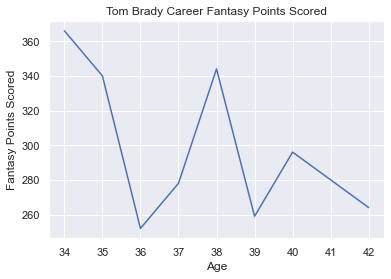

In [10]:
plot_f('Tom Brady')

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

# ACF Plot Function
def acf_plot_f(player_name):
    autocorrelation_plot(player(player_name).FantPt)
    plt.show()



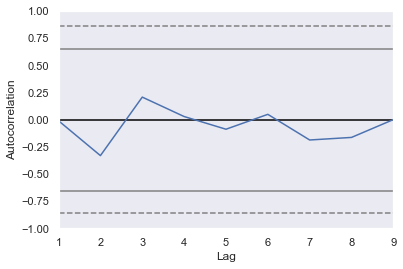

In [12]:
acf_plot_f('Tom Brady')

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
# Partial Autocorrelation Function
def pacf_plot_f(player_name):
    plot_pacf(player(player_name).FantPt)
    plt.show()

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


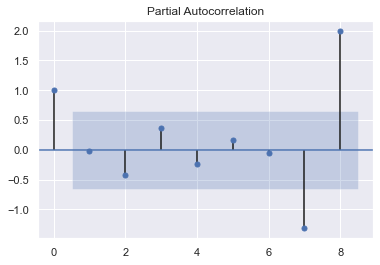

In [14]:
pacf_plot_f('Tom Brady')

In [15]:
# ARIMA Model
# import warnings

# # Function to forecast number of fantasy points in a standard fantasy league

def forecast_f(player_name):
    qb_model = ARIMA(player(player_name).FantPt, order = (2,1,0))
    model_fit = qb_model.fit()
    forecast = model_fit.forecast(steps = 1)


    return print(forecast)

In [16]:
# # ARIMA Model
# import warnings

# Function to forecast number of fantasy points in a standard fantasy league

# def rb_forecast_f(player_name):
#     rb_model = ARIMA(player(player_name).FantPt, order = (2,1,0))
#     model_fit = rb_model.fit()
#     forecast = model_fit.forecast(steps = 1)


#     return print(forecast)

In [17]:
# ARIMA Model
# import warnings

# # Function to forecast number of fantasy points in a standard fantasy league

# def wr_forecast_f(player_name):
#     wr_model = ARIMA(player(player_name).FantPt, order = (2,1,0))
#     model_fit = wr_model.fit()
#     forecast = model_fit.forecast(steps = 1)


#     return print(forecast)

In [18]:
import warnings

warnings.filterwarnings('ignore')

forecast_f('Tom Brady')

9    295.490167
dtype: float64


In [19]:
# Function to return players 2020 fantasy points
def actual_f(player_name):
    df = test_df[test_df['Player'] == player_name]
    actual = df['FantPt'].iloc[0]
    return actual

In [20]:
# Function to evaluate the ARIMA model using mean absolute error as our error statistic
def evaluate_arima_model(player_name, arima_order):

    model = ARIMA(player(player_name).FantPt, order = arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 1)

    


    mean_absolute_error = np.mean(abs((actual_f(player_name) - forecast.iloc[0])))


    return mean_absolute_error


In [21]:
order = (10,1,1)

evaluate_arima_model('DeAndre Hopkins',order)

40.94534203196821

In [22]:
# Grid Search Function to find parameters for ARIMA that minimize the Mean Absolute Error
def evaluate_models(player_name, p_values, d_values, q_values):

    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(player_name, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('ARIMA%s MAE=%.3f' % (order,mae))
                except:
                    continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [23]:
# Function we use to build a pipeline
def evaluate_models1(player_name, p_values, d_values, q_values):
    #dataset = dataset[:1420]
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(player_name, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    #print('ARIMA%s MAE=%.3f' % (order,mae))
                except:
                    continue
    print('Player:%s MAE=%.3f' % (player_name, best_score))
    return best_cfg

# Player Forecast Function. enter player name and it will return the project fantasy points for the 2021 season. Optimizes ARIMA for each player as a QB's career trajectory is vastly different from a Running Back


In [30]:
def forecast_f_2021(player_name):
    p_values = [0, 1, 2,3, 4,5]
    d_values = range(0, 3)
    q_values = range(0, 10)
    
    best_cfg = evaluate_models1(player_name, p_values, d_values, q_values)
    rb_model = ARIMA(player(player_name).FantPt, order = best_cfg)
    model_fit = rb_model.fit()
    forecast = model_fit.forecast(steps = 2).iloc[1].round(decimals = 2)


    return print(player_name + ' Is projected: ' + str(forecast) +  ' Fantasy points for the 2021 season. ')

In [25]:
# Forecast Function for the pipeline

def forecast_f_2021_actual(player_name):
    p_values = [0, 1, 2,3, 4,5]
    d_values = range(0, 3)
    q_values = range(0, 5)
    
    best_cfg = evaluate_models1(player_name, p_values, d_values, q_values)
    rb_model = ARIMA(player(player_name).FantPt, order = best_cfg)
    model_fit = rb_model.fit()
    forecast = model_fit.forecast(steps = 2).iloc[1].round(decimals = 2)


    return forecast

In [26]:
# Projected top 8 picks according to FantasyPros.com
projected_top_8 = ['Christian McCaffrey','Dalvin Cook','Derrick Henry','Saquon Barkley','Alvin Kamara','Ezekiel Elliott','Aaron Jones','Nick Chubb']

# Empty DF
forecast_df = pd.DataFrame()
# Empty Forecast List we will use in the loop belw
forecast_list = []

#def rank_players(player_list):
for players in projected_top_8:
    
    # Obtain Forecast and Append to list
    player_forecast_2021 = forecast_f_2021_actual(players)
    forecast_list.append(player_forecast_2021)
    

    

# Create name and Projected Fantasy Points DataFrame
forecast_df['Name'] = projected_top_8
forecast_df['Projected 2021 Fantasy Points'] = forecast_list
    
    
        

        
        

Player:Christian McCaffrey MAE=15.180
Player:Dalvin Cook MAE=55.717
Player:Derrick Henry MAE=98.393
Player:Saquon Barkley MAE=182.995
Player:Alvin Kamara MAE=9.394
Player:Ezekiel Elliott MAE=18.833
Player:Aaron Jones MAE=2.512
Player:Nick Chubb MAE=5.000


In [27]:
# View the DataFrame
forecast_df

,Name,Projected 2021 Fantasy Points
0,Christian McCaffrey,88.18
1,Dalvin Cook,114.09
2,Derrick Henry,245.73
3,Saquon Barkley,295.00
4,Alvin Kamara,233.23
5,Ezekiel Elliott,234.64
6,Aaron Jones,250.75
7,Nick Chubb,197.00


In [28]:
# Sort DataFrame by Projected Fantasy Points
forecast_df = forecast_df.sort_values('Projected 2021 Fantasy Points', ascending = False)

Text(0, 0.5, 'Projected Total Fantasy Points (Standard)')

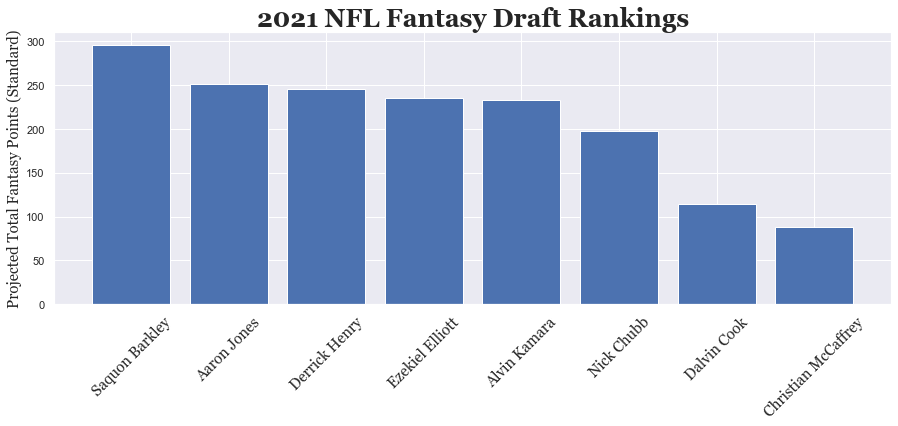

In [29]:
# Final Bar Plot showing project fantasy points
font = {'fontname': 'Georgia'}

plt.figure(figsize = (15,5))
plt.bar(forecast_df['Name'], forecast_df['Projected 2021 Fantasy Points'] )
plt.xticks(rotation = 45, fontsize = 15, **font)
plt.title('2021 NFL Fantasy Draft Rankings',fontsize = 25, fontweight = 'bold',**font)
plt.ylabel('Projected Total Fantasy Points (Standard)',fontsize = 15,**font)
